# Data Science Project

## Team
### CS22B1052 G Chaitanya Reddy
### CS22B1055 S Vignesh

# Country Segmentation for Aid Allocation

### Project Understanding

- **Objective**: To categorize countries based on socio-economic and health factors using EDA and K-Means clustering to identify those most in need of financial aid.

We'll conduct our analysis study case using the [HELP International](https://www.kaggle.com/datasets/gauravduttakiit/help-international?resource=download) dataset. Click the highlited to access the Kaggle dataset.

### Variable Description

- **country**: Name of the country
- **child_mort**: Death of children under five years of age per 1000 live births
- **exports**: Exports of goods and services per capita. As a percentage of the GDP per capita
- **health**: Total health spending per capita. As a percentage of GDP per capita
- **import**: Imports of goods and services per capita. As a percentage of the GDP per capita
- **income**: Net income per person
- **inflation**: The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a newborn child would live if the current mortality patterns are to remain the same
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates stay the same.
- **gdpp**: The GDP per capita. Calculated as the total GDP divided by the total population.

In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Data Preview


In [31]:
df = pd.read_csv('Country-data.csv')

df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


# Data Discretization

In [32]:
df = df[df.income < df.income.median()]
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


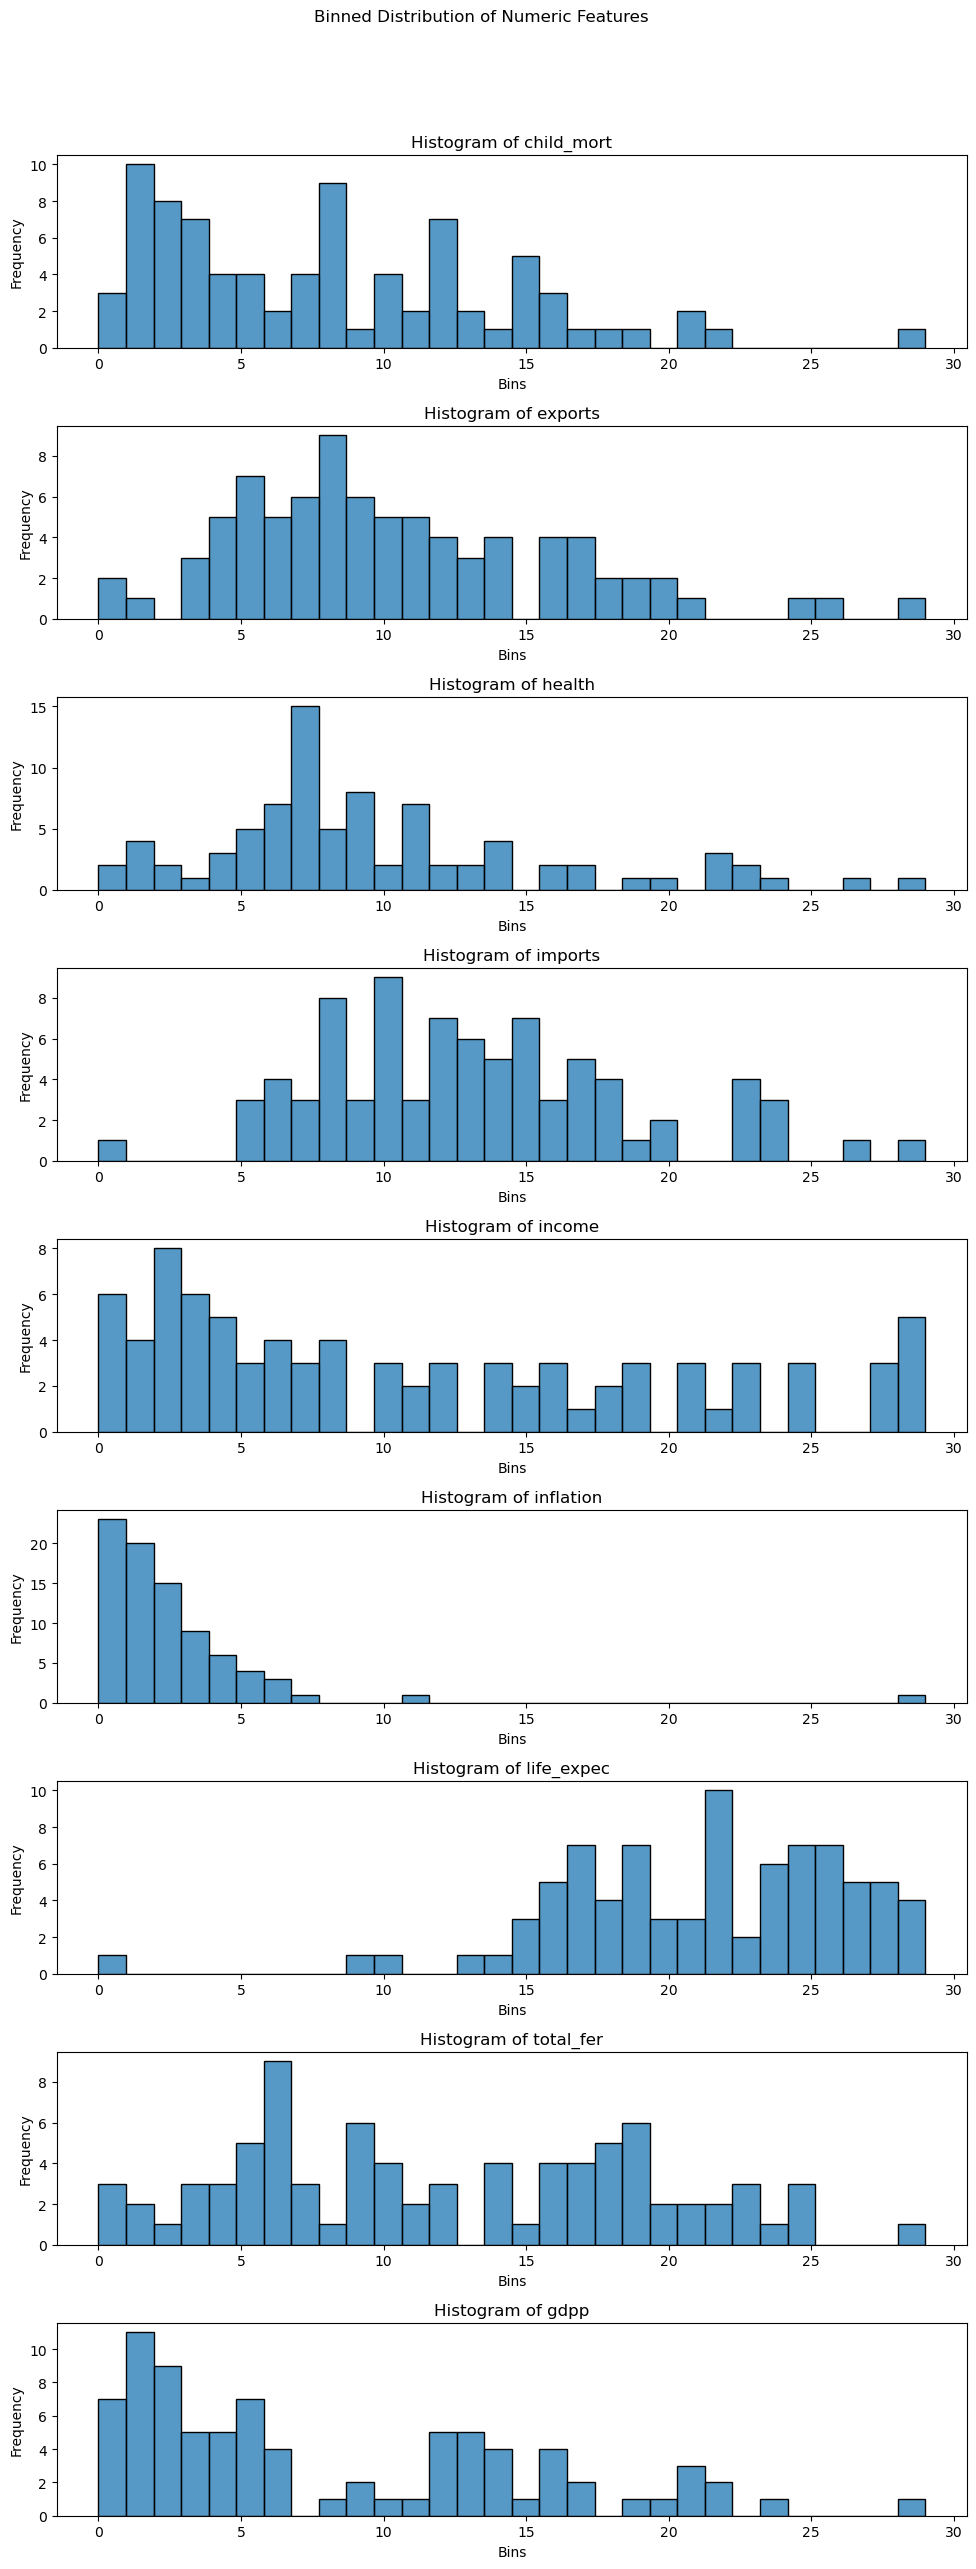

In [33]:


# Identify numeric features (excluding the 'country' column which is non-numeric)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Apply pd.cut to each numeric feature
for feature in numeric_features:
    df[feature] = pd.cut(df[feature], bins=30, labels=False, include_lowest=True)

# Plot histograms for each binned feature
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, len(numeric_features)*3))
fig.suptitle("Binned Distribution of Numeric Features")

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], bins=30, ax=axes[i], kde=False)
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel("Bins")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


1. **Simplified Data**:  
   Binning turned continuous features into categories, highlighting overall patterns.

2. **Frequency Insights**:  
   Histograms reveal where data points are most concentrated.

3. **Detected Trends**:  
   Identified clusters, gaps, and distribution shapes for each feature.

4. **Easy Comparison**:  
   Binned data aids quick feature comparison during EDA.

# Data Cleaning
*Removing Missing and duplicate values*

In [34]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

*No NULL Values*

**Duplicated Value**

*To find duplicated values.*

In [35]:
df[df.duplicated(keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


*No duplicates detected*

<h1>Data Visualization</h1> 


**Univariate Analysis**

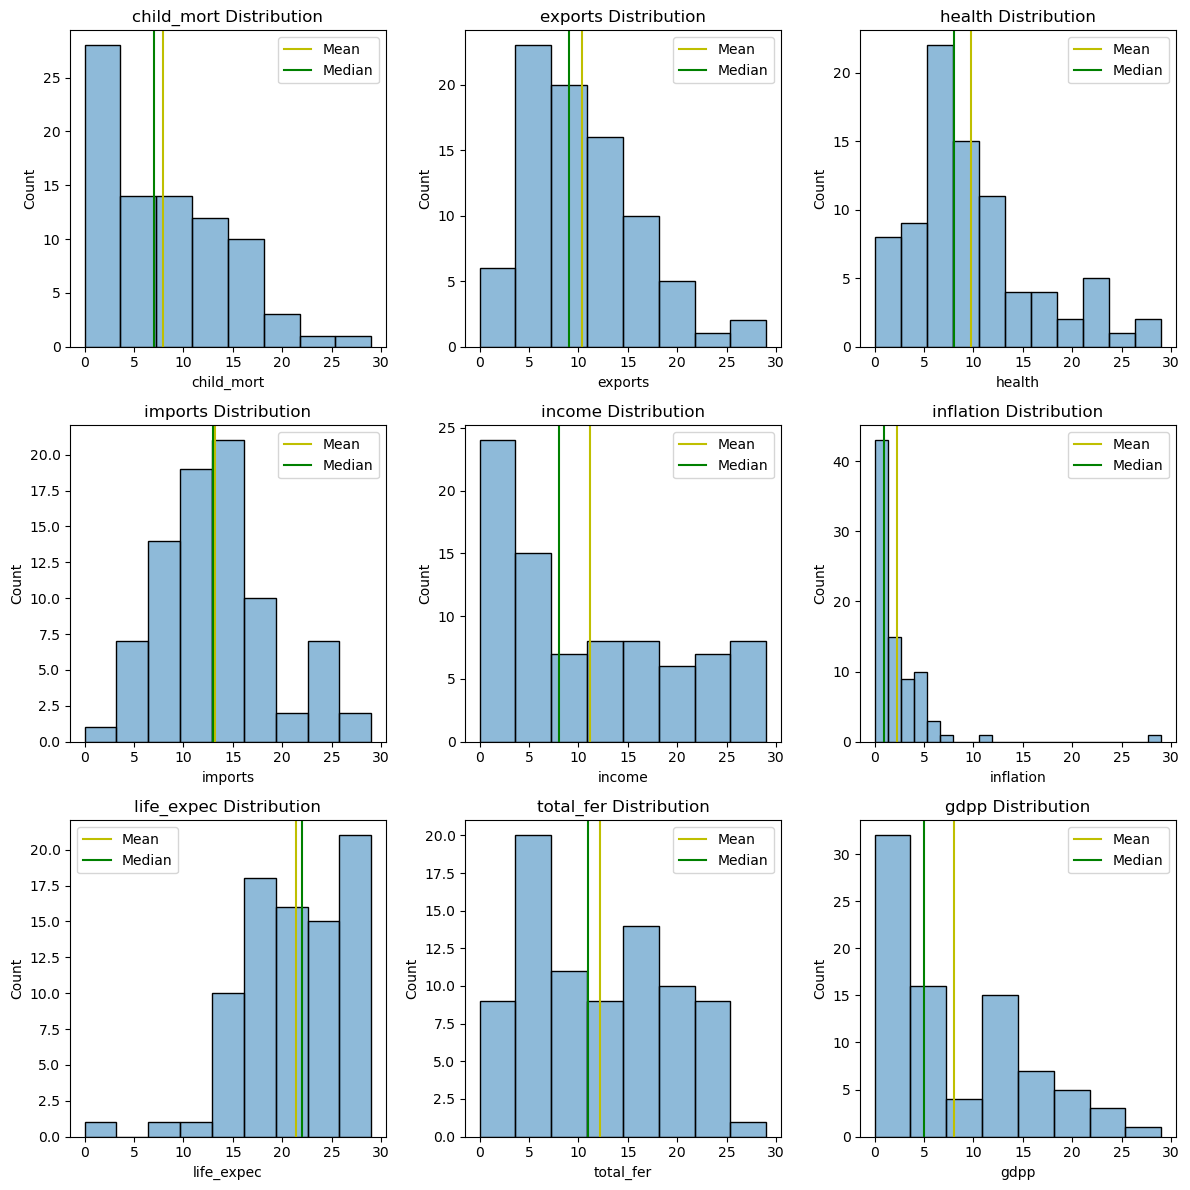

In [36]:
plt.figure(figsize=(12,12))

for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.histplot(x=df[j], alpha=.5)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(df[j].mean(), label='Mean', color='y')
    plt.axvline(df[j].median(), label='Median', color='g')
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
plt.savefig('hist.png')
plt.show()

As we can see from the above histogram of our dataset, we can gather some information below about our data distribution of each variable:
- **child_mort**: Have right-skewed distribution.
- **exports**: Have right-skewed distribution.
- **health**: Have right-skewed distribution.
- **import**: Have right-skewed distribution.
- **income**: Have right-skewed distribution.
- **inflation**: Have right-skewed distribution.
- **life_expec**: Have left-skewed distribution.
- **total_fer**: Have right-skewed distribution.
- **gdpp**: Have right-skewed distribution.

**Box Plotting** 

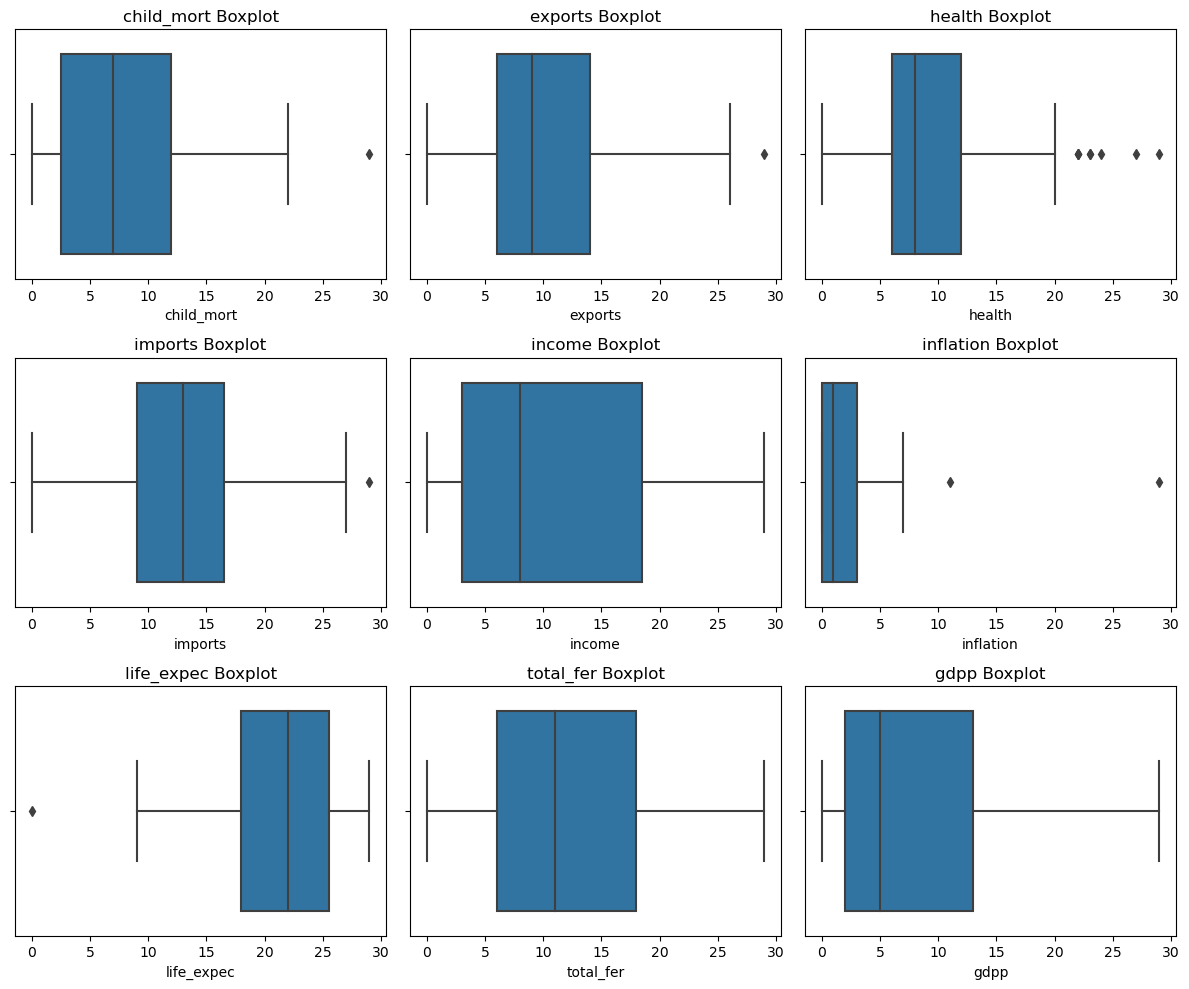

In [37]:
plt.figure(figsize=(12,10))

for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
plt.savefig('box.png')
plt.show()

<span>We will keep the outliers for now, as they reflect real variations across countries. However, since some values are extremely high or low, we’ll revisit the outliers after selecting the optimal features for clustering.

The boxplot reveals that GDP per capita (gdpp) and income have the most outliers. Later, we’ll assess which countries might qualify for financial aid, taking into account each nation’s economic conditions and health status in line with the business objective</span>s.

# Data Transformation

<h4>Data Smoothing<h4>

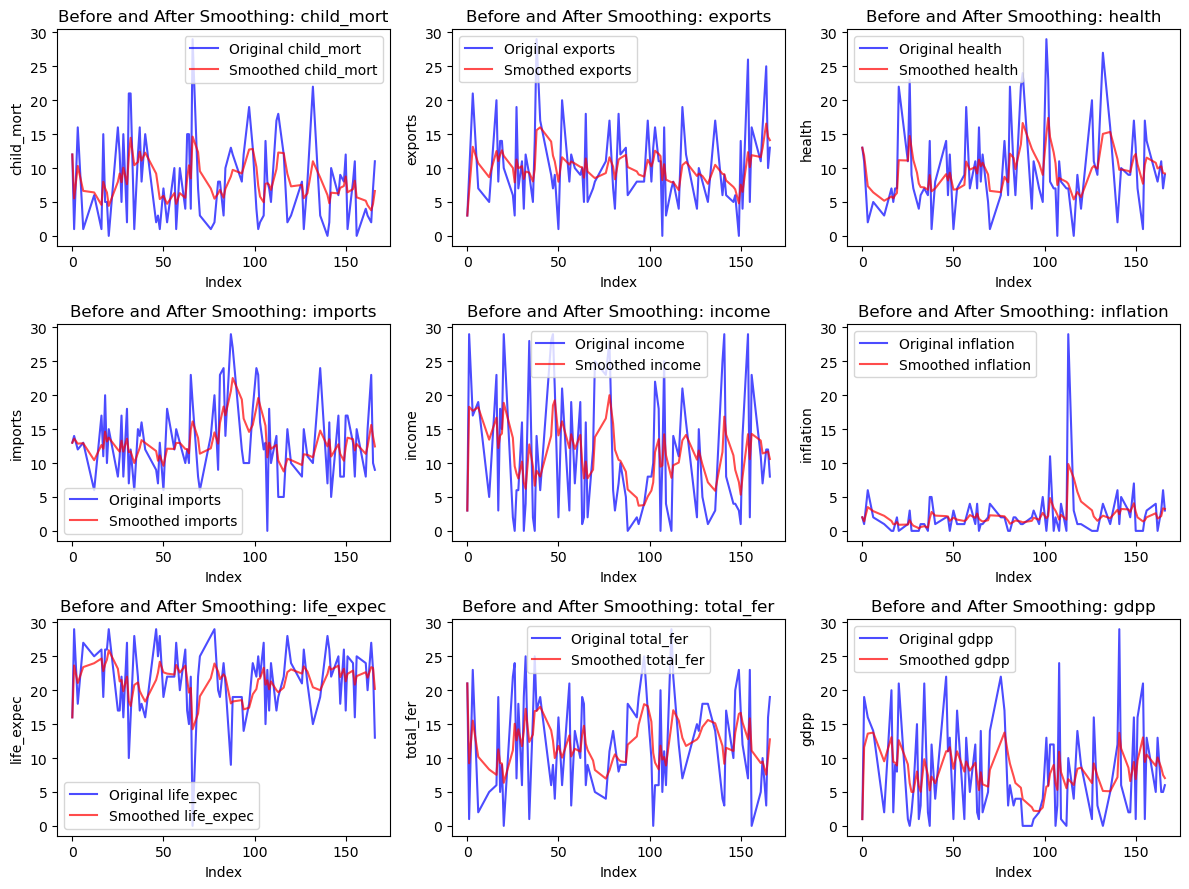

In [38]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe and numeric_features is a list of column names
num_features = len(numeric_features)

# Number of columns in each row
cols = 3

# Calculate the number of rows needed
rows = (num_features + cols - 1) // cols  # This ensures we have enough rows to fit all the plots

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))

# Flatten the axes array so we can index it easily
axes = axes.flatten()

# Iterate through the features and create the plots
for i, feature in enumerate(numeric_features):
    ax = axes[i]

    # Plotting the original data (before smoothing)
    ax.plot(df[feature], label=f'Original {feature}', color='blue', alpha=0.7)

    # Plotting the smoothed data (after smoothing)
    df_smoothed = df[feature].ewm(alpha=0.3).mean()
    ax.plot(df_smoothed, label=f'Smoothed {feature}', color='red', alpha=0.7)

    # Adding title and labels
    ax.set_title(f'Before and After Smoothing: {feature}')
    ax.set_xlabel('Index')
    ax.set_ylabel(f'{feature}')
    ax.legend()

# Remove any empty subplots (in case we have more columns than needed)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

1. **Visualized Raw and Smoothed Data**:  
   We plotted each numeric feature with both its original values and a smoothed version, which helps us see clearer trends.

2. **Enhanced Trend Detection**:  
   By smoothing the data, we reduced some of the noise, making it easier to spot underlying patterns in each feature.

3. **Side-by-Side Comparison**:  
   We can now easily compare the raw and smoothed data to observe any shifts or trends.

4. **Clean Layout**:  
   We arranged the plots neatly in rows and columns, so everything is easy to view and interpret.</span>

<h4>Data Aggregation<h4>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     83 non-null     object
 1   child_mort  83 non-null     int64 
 2   exports     83 non-null     int64 
 3   health      83 non-null     int64 
 4   imports     83 non-null     int64 
 5   income      83 non-null     int64 
 6   inflation   83 non-null     int64 
 7   life_expec  83 non-null     int64 
 8   total_fer   83 non-null     int64 
 9   gdpp        83 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 7.1+ KB


<h4>Data Normalization<h4>

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df)


         country  child_mort   exports    health   imports    income  \
0    Afghanistan    0.651579 -1.251149  0.522372 -0.034450 -0.882713   
1        Albania   -1.118932 -0.228042  0.203572  0.144258  1.931016   
3         Angola    1.295401  1.818172 -1.231032 -0.213157  0.632372   
6        Armenia   -1.118932 -0.569078 -0.752831 -0.034450  0.848813   
12    Bangladesh   -0.314154 -0.910113 -1.071631 -1.285403 -0.666272   
..           ...         ...       ...       ...       ...       ...   
161   Uzbekistan   -0.636065  0.112994 -0.115229 -0.927988 -0.016950   
162      Vanuatu   -0.797021  0.965583 -0.274630  0.322965 -0.449832   
164      Vietnam   -0.957976  2.500244  0.203572  1.752626  0.091270   
165        Yemen   -0.153199 -0.057524 -0.434030 -0.570572  0.091270   
166       Zambia    0.490623  0.454030 -0.115229 -0.749280 -0.341611   

     inflation  life_expec  total_fer      gdpp  
0    -0.067454   -1.034877   1.205672 -0.972328  
1    -0.347387    1.457605  -1.5435



1. **Standardized Feature Scales**:  
   By normalizing each numeric feature, we ensured all data is on a similar scale, making comparisons and analysis across variables more consistent.

2. **Improved Model Compatibility**:  
   With normalized data, our dataset is now better suited for machine learning models that are sensitive to feature magnitudes, especially distance-based algorithms.

3. **Reduced Outlier Influence**:  
   Standardizing helps reduce the impact of extreme values, leading to more stable and robust model performance.

4. **Enhanced Interpretability**:  
   With each feature centered around a mean of 0 and a standard deviation of 1, it’s easier to observe relative differences between data points and interpret trends across features.

<h3>Correlation Analysis<h3>

In [41]:
# Drop the 'country' column before calculating correlation
correlation_metrics = df.drop(columns=['country']).corr()


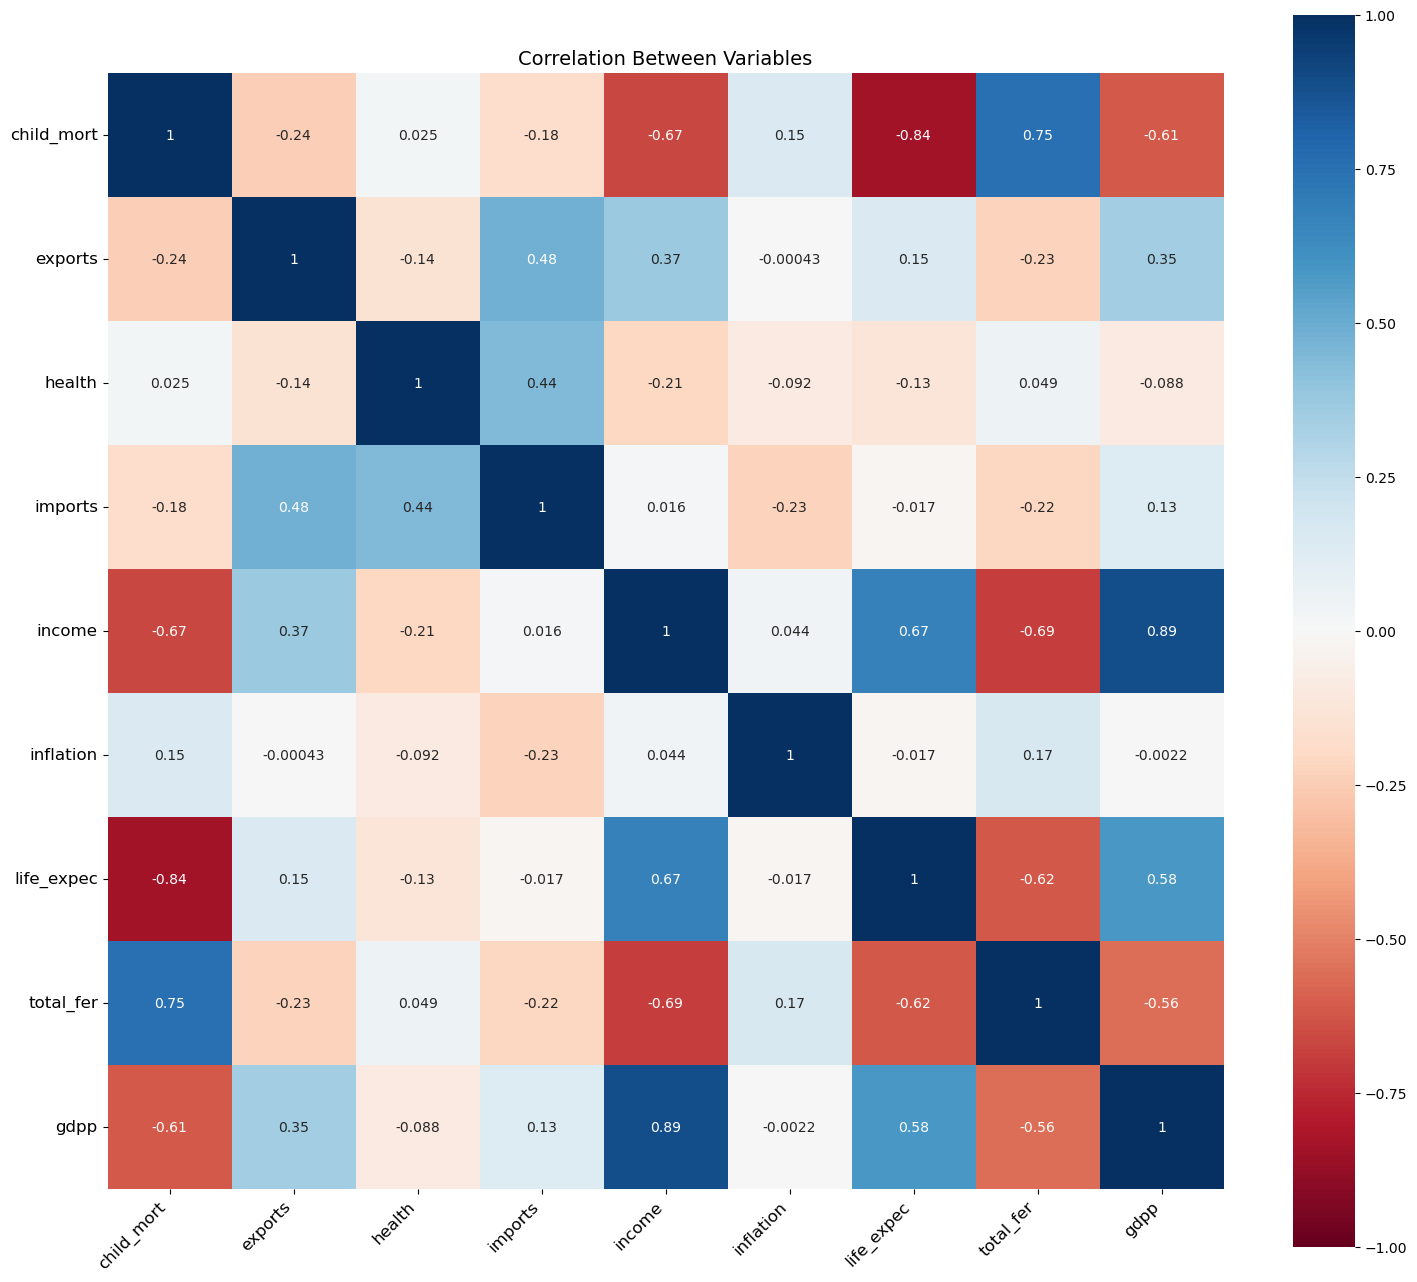

In [42]:
# Calculate correlation metrics


# Create the heatmap plot
fig = plt.figure(figsize=(18,16))
heatmap = sns.heatmap(correlation_metrics, square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')

# Set title and labels
plt.title('Correlation Between Variables', size=14)

# Adjust tick parameters for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Save and show the heatmap
plt.savefig('heatmap.png')
plt.show()


1. **Child Mortality & Life Expectancy**: Strong negative correlation, indicating higher child mortality with lower life expectancy.

2. **Income & GDP per Capita**: Strong positive correlation, showing higher incomes with higher GDP per capita.

3. **Fertility & Child Mortality**: Positive correlation, suggesting higher fertility rates are linked to higher child mortality.

# Data Reduction

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
correlation_metrics = pca.fit_transform(correlation_metrics)
print(correlation_metrics)

[[ 2.02919213 -0.21349504]
 [-0.56259647  0.28387525]
 [ 0.55754104  0.76319098]
 [-0.11488101  1.00993976]
 [-1.52367191 -0.33345854]
 [ 0.47508712 -0.77361691]
 [-1.387465   -0.2949361 ]
 [ 1.92332665 -0.26594065]
 [-1.39653255 -0.17555875]]


1. **Dimensionality Reduction**:  
   By applying PCA, we reduced the complexity of the data, transforming it into two principal components. This helps in simplifying the data while preserving as much information as possible.

2. **Improved Visual Analysis**:  
   Reducing the features to 2 components enables easier visualization, helping us to identify patterns and clusters in the data more effectively.

3. **Noise Reduction**:  
   PCA minimizes noise by focusing on the most significant variations in the data, making the dataset more manageable for further analysis and modeling.

4. **Enhanced Understanding of Relationships**:  
   The transformation of the correlation metrics into principal components helps us better understand the most influential variables and how they interact, guiding feature selection for future modeling. analysis.

# K-Means Clustering

<h4>Finding the number of clusters using elbow method<h4>

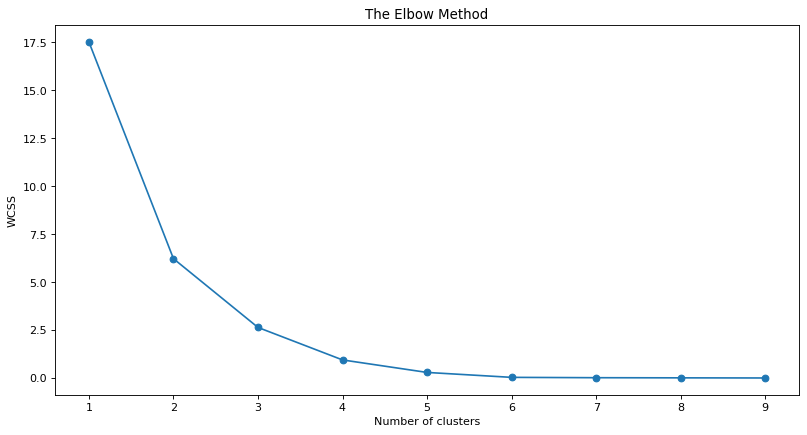

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define WCSS (Within-Cluster Sum of Squares)
wcss = []

# Range of k values to try
k_range = range(1, len(correlation_metrics) + 1)


# Elbow method to determine optimal number of clusters
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(correlation_metrics)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')

# Optional: Add annotations for each WCSS point
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value, 1), fontsize=12, fontweight='bold')

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('num_clust.png')
plt.show()



From the elbow curve, we can see that 3 clusters will be the best option to continue the clustering.

In [45]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")

print('The elbow located is : {}'.format(kl.elbow))

The elbow located is : 3


If we hesitate to determine the K value from the elbow method graph, we can use a help of a function called KneeLocater from the kneed library. The output of the code is 3.

<h3>Clustering<h3>


After we have the number of clusters that fits the features, we will conduct the clustering using the KMeans() function from the scikit-learn library

In [46]:
# First, scale the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Now, apply PCA on the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(df[numeric_columns])  # This gives us the reduced data

# Perform K-means clustering on the PCA-reduced data
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(pca_result)  # Fit on the PCA results

# Assign cluster labels to the original DataFrame (df)
df['cluster_id_pca'] = kmeans_pca.labels_

# Display the result
display(df)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_pca
0,Afghanistan,0.651579,-1.251149,0.522372,-0.034450,-0.882713,-0.067454,-1.034877,1.205672,-0.972328,1
1,Albania,-1.118932,-0.228042,0.203572,0.144258,1.931016,-0.347387,1.457605,-1.543525,1.532255,0
3,Angola,1.295401,1.818172,-1.231032,-0.213157,0.632372,1.052278,-0.651418,1.480591,1.114824,1
6,Armenia,-1.118932,-0.569078,-0.752831,-0.034450,0.848813,-0.067454,1.074147,-1.406065,0.836537,0
12,Bangladesh,-0.314154,-0.910113,-1.071631,-1.285403,-0.666272,-0.347387,0.690688,-0.993685,-0.833185,1
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,-0.636065,0.112994,-0.115229,-0.927988,-0.016950,0.492412,0.498958,-0.993685,-0.415754,0
162,Vanuatu,-0.797021,0.965583,-0.274630,0.322965,-0.449832,-0.627320,-0.267959,-0.306386,0.697394,0
164,Vietnam,-0.957976,2.500244,0.203572,1.752626,0.091270,0.212479,1.074147,-1.268605,-0.415754,0
165,Yemen,-0.153199,-0.057524,-0.434030,-0.570572,0.091270,1.052278,0.307229,0.518373,-0.415754,1


 The resulting cluster labels from K-means are assigned to the original DataFrame (df) under the column cluster_id_pca.

In [47]:
df.cluster_id_pca.value_counts(ascending=True)


2     9
0    33
1    41
Name: cluster_id_pca, dtype: int64

Provides the count of data points in each cluster, sorted in ascending order of frequency.

In [48]:
print(pca_result.shape)  # Should print (167, 2) if you have 167 rows and 2 components


(83, 2)


<h4>Plotting the clusters<h4>

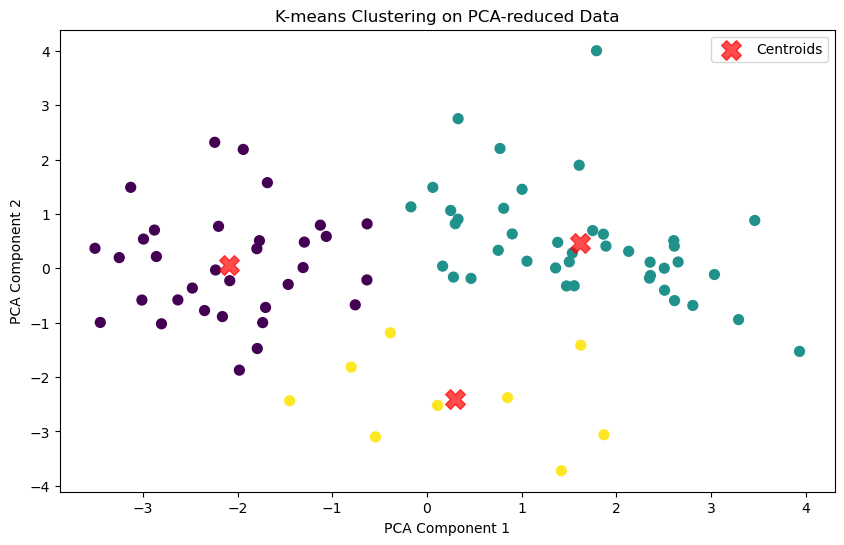

In [49]:
# Plot the clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
# Use the PCA-transformed data, i.e., pca_result, instead of correlation_metrics
plt.scatter(pca_result[:, 0], pca_result[:, 1], 
            c=kmeans_pca.labels_, cmap='viridis', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title('K-means Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.savefig('pca_cluster_result.png')
plt.show()


According to the scatterplot, the purple cluster (Cluster 1) may represent countries most in need of targeted financial aid, as they likely have lower income levels and higher child mortality rates. For example, countries in this cluster may have net incomes below 10,000 and child mortality rates above 50 per 1,000 live births. In contrast, the yellow cluster (Cluster 2) appears to represent relatively higher-income countries with better health indicators, while the turquoise cluster (Cluster 3) could signify middle-income countries with moderate health outcomes. This clustering helps identify varying levels of need, allowing for prioritization in aid allocation based on socioeconomic and health criteria.

In [50]:
# Get the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.43830598 0.18424798]


In [51]:
# Assuming you selected a subset of columns (e.g., 9 columns for PCA)
pca_columns = df.columns[1:10]  # Use only the first 9 columns
print("PCA Components (loadings):")
print(pd.DataFrame(pca.components_, columns=pca_columns))

PCA Components (loadings):
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.445061 -0.218971  0.066857 -0.106769 -0.454900   0.048189   -0.416933   
1    0.026382 -0.274691 -0.529360 -0.690761  0.148473   0.339765    0.153339   

   total_fer      gdpp  
0   0.418079 -0.424529  
1   0.058130  0.045826  


In [52]:
#
centroids = kmeans_pca.cluster_centers_
original_centroids = pca.inverse_transform(centroids)


Inversing transform the centroids back to the original feature space using PCA

In [53]:
# Display the original feature values at the centroids of each cluster
# The original centroids after inverse transformation should match the number of PCA components
pca_columns = [f"PCA_Component_{i+1}" for i in range(original_centroids.shape[1])]  # 9 PCA components
print("Cluster Centroids in Original Feature Space:")
print(pd.DataFrame(original_centroids, columns=pca_columns))


Cluster Centroids in Original Feature Space:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0        -0.927574         0.438553        -0.175645         0.175933   
1         0.731247        -0.483539        -0.142362        -0.499095   
2         0.069867         0.594761         1.292567         1.628568   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0         0.960023        -0.077499         0.881072        -0.869069   
1        -0.664449         0.238501        -0.600831         0.702686   
2        -0.493151        -0.802341        -0.493479        -0.014536   

   PCA_Component_9  
0         0.889615  
1        -0.663941  
2        -0.237300  


In [54]:
print(original_centroids)

[[-0.92757384  0.438553   -0.17564457  0.17593274  0.9600227  -0.07749851
   0.88107167 -0.86906927  0.88961474]
 [ 0.73124724 -0.48353888 -0.14236183 -0.49909487 -0.66444853  0.23850054
  -0.60083066  0.70268556 -0.66394113]
 [ 0.06986667  0.59476056  1.29256734  1.62856771 -0.49315104 -0.80234126
  -0.49347868 -0.01453579 -0.2373    ]]


In [55]:
df_drop = df.drop(columns=['country','cluster_id_pca'])
y=df['cluster_id_pca']

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_drop, y)

# Get the coefficients, which act as the weights
weights = model.coef_
print(weights)

[ 0.0449814  -0.0532478   0.08452008  0.15511331 -0.33892558  0.06707037
 -0.01162436 -0.04141335 -0.12481911]


1. **Linear Regression for Aid Prediction**: Fits a model to predict aid needs based on socio-economic features.

2. **Feature Importance via Weights**: The coefficients (`weights`) show each feature's impact on aid needs, highlighting critical indicators.

In [57]:
poverty_score = [0]*3
for i in range (9):
    poverty_score += (original_centroids[:, i] * weights[i])

print("Poverty Score for each cluster:", poverty_score)



Poverty Score for each cluster: [-0.46849738  0.27114239  0.48261953]


In [58]:
# Find the index of the cluster with the minimum value in the relevant PCA component
poorest_cluster_index = poverty_score.argmax()  # Choose the appropriate component for your case

print("Poorest Cluster Index:", poorest_cluster_index)

# Now filter the countries based on the cluster label (assuming df has a column for cluster labels)
poorest_countries = df[df['cluster_id_pca'] == poorest_cluster_index]

# Count the number of countries in the poorest cluster
poorest_countries_count = poorest_countries.shape[0]

print("Number of countries in the poorest cluster:", poorest_countries_count)


Poorest Cluster Index: 2
Number of countries in the poorest cluster: 9


1. **Identify Poorest Cluster**: The code finds the cluster index with the highest poverty score using PCA results to target the most financially needy group.

2. **Count Countries in Target Cluster**: Filters countries by this cluster index to count those needing the most aid, focusing resources effectively.

In [59]:
# Assuming the column that contains the country names is named 'country_name'

# Filter the DataFrame for the countries in the poorest cluster
poorest_countries = df[df['cluster_id_pca'] == poorest_cluster_index]

# List the country names in the poorest cluster
poorest_country_names = poorest_countries['country'].tolist()

# Print the list of country names
print("Countries in the poorest cluster:")
print(poorest_country_names)


Countries in the poorest cluster:
['Cambodia', 'Kiribati', 'Kyrgyz Republic', 'Lesotho', 'Liberia', 'Micronesia, Fed. Sts.', 'Moldova', 'Solomon Islands', 'Togo']
